1\. Write a function that converts number representation (bin<->dec<->hex)

In [37]:
n = int(input("Insert a number: "))
def conv(n):
    print("number: ",n ,"\nbinary: ", bin(n),"\nhexa: ", hex(n))
conv(n)

Insert a number: 30
number:  30 
binary:  0b11110 
hexa:  0x1e


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [24]:
def conv_float(x):
    exp = 0
    mantissa = 1
    bias = 127
    s = x[0]
    
    for k in range (1,9):
        exp += int(x[k])*2**(8-k)
    
    m = x[9:32]
    for j in range(23):
        mantissa += int(m[j])*2**(-j-1)
        
    print("exp: ", exp, "\nmantissa: ", mantissa)
    
    n = mantissa*2**(exp-bias)
    
    if int(s) == 0:
        print("\nIl numero convertito è: ", n)
    if int(s) == 1:
        print("\nIl numero convertito è: ", -n)

conv_float("10111111100000000000000000000000")


exp:  127 
mantissa:  1.0

Il numero convertito è:  -1.0


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [25]:
import sys
import math

print(sys.float_info)

under = 1.
over = 1.

while(under != 0):
    vunder = under
    under = under / 2
while (over != math.inf):
    vover = over
    over *= 2

print("Overflow: ", vover, "\nUnderflow: ", vunder)

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)
Overflow:  8.98846567431158e+307 
Underflow:  5e-324


4. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [28]:
x = 1
y = 2
e = 1

while (x != y):
    y = x + e
    e /= 2
print(e)

5.551115123125783e-17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [36]:
def second_order_eqs(a,b,c):
    x1 = (-b - pow((b**2-4*a*c),1/2))/(2*a)
    x2 = (-b + pow((b**2-4*a*c),1/2))/(2*a)
    print(x1,x2)

def second_order_eqs1(a,b,c):
    x1 = ((-b + (b**2-4*a*c)**(1/2))*(-b - (b**2-4*a*c)**(1/2)))/((2*a)*(-b - (b**2-4*a*c)**(1/2)))
    x2 = ((-b - (b**2-4*a*c)**(1/2))*(-b + (b**2-4*a*c)**(1/2)))/((2*a)*(-b + (b**2-4*a*c)**(1/2)))
    print(x1,x2)

second_order_eqs(0.001,1000,0.001)
second_order_eqs1(0.001,1000,0.001)

-999999.999999 -9.999894245993346e-07
-9.999894245993346e-07 -999999.9999990001


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

derivative scaling with different delta values:

1.010000000000001 delta = 0.01
1.0000999999998899 delta = 0.0001
1.0000009999177333 delta = 1e-06
1.0000000039225287 delta = 1e-08
1.000000082840371 delta = 1e-10
1.0000889005833413 delta = 1e-12
0.9992007221626509 delta = 1e-14


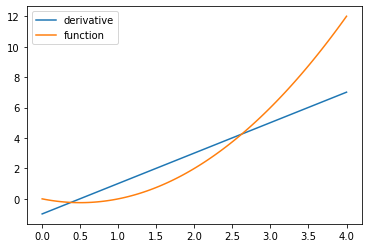

In [59]:
import matplotlib.pyplot as plt
import numpy as np
delta = [10**(-2), 10**(-4), 10**(-6), 10**(-8), 10**(-10), 10**(-12), 10**(-14)]

def func(x):
    return x*(x-1)

def derivative_fun(x):
    print("derivative scaling with different delta values:\n")
    for i in range(len(delta)):
        print((func(x+delta[i])-func(x))/delta[i], "delta =", delta[i])
        
def func_der_plot(delta):
    x = np.linspace(0,4,100)
    plt.plot(x, (func(x+delta)-func(x))/delta, label = "derivative")
    plt.plot(x, func(x), label = "function")
    plt.legend()
    plt.show()
    
derivative_fun(1)
func_der_plot(0.01)

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [34]:
import numpy as np

def func(x):
    return (1-x**2)**(1/2)

def integral(N):
    I = 0
    h = (1-(-1))/N
    for k in range(N):
        I += h*func(k/N)
    return I

print(abs(np.pi/2-integral(100)))
print(abs(integral(150000000)-integral(2500000)))
#%timeit integral (2500000) - 1 sec
#%timeit integral (150000000) - 1 min

0.009412189094627044
3.9318482514261177e-07
